### Packages

In [1328]:
# Import packages

# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Import Data

In [1329]:
df = pd.read_excel("Data_sample_(5).xlsx", usecols=range(19))
df.head()

,id,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,Count,Total Time
0,53134335.0,DeliveredStatus,85260.0,18579597.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,6.029,2019-07-13 13:04:44,2019-07-13 13:05:32,2019-07-13 13:06:49,2019-07-13 13:09:13,2019-07-13 13:28:45,2019-07-13 13:46:58,2019-07-13 13:59:49,NaN,55
1,53009545.0,DeliveredStatus,23517.0,11871195.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,3.998,2019-07-12 20:06:29,2019-07-12 20:10:42,2019-07-12 20:11:02,2019-07-12 20:16:05,2019-07-12 20:23:07,2019-07-12 20:37:53,2019-07-12 20:43:01,NaN,36
2,53129297.0,DeliveredStatus,18300.0,1053786.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,5.309,2019-07-13 12:14:58,2019-07-13 12:15:44,2019-07-13 12:23:40,2019-07-13 12:45:16,2019-07-13 12:50:09,2019-07-13 12:55:16,2019-07-13 12:59:23,NaN,44
3,53235752.0,CanceledStatus,85260.0,20466508.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,6.429,2019-07-13 21:55:58,2019-07-13 22:24:58,2019-07-13 22:24:58,NaT,NaT,NaT,2019-07-13 22:25:15,NaN,29
4,53002671.0,DeliveredStatus,15912.0,16549489.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,3.442,2019-07-12 19:40:13,2019-07-12 19:41:14,2019-07-12 19:42:34,2019-07-12 19:46:28,2019-07-12 19:56:59,2019-07-12 20:07:08,2019-07-12 20:10:37,NaN,30


### Data Cleaning

In [1330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id                                        2471 non-null   float64       
 1   final_status                              2471 non-null   object        
 2   store_address_id                          2440 non-null   float64       
 3   customer_id                               2471 non-null   float64       
 4   courier_id                                2471 non-null   float64       
 5   vertical                                  2471 non-null   object        
 6   is_food                                   2471 non-null   float64       
 7   transport                                 2471 non-null   object        
 8   number_of_assignments                     2471 non-null   float64       
 9   total_real_distance           

In [1331]:
# Convert final_status to a bool is_canceled_status
df["is_canceled_status"] = df.final_status.replace({"DeliveredStatus": 0, "CanceledStatus": 1})

In [1332]:
# Convert is_food to bool
df.is_food.replace({1: True, 0: False}, inplace=True)

In [1333]:
# Drop empty Count column
df.drop(columns="Count", inplace=True)

In [1334]:
print(df.id.value_counts())
# Drop useless id column
df.drop(columns="id", inplace=True)

53427130.0    1
52315775.0    1
53188131.0    1
52404788.0    1
52858763.0    1
             ..
52726573.0    1
52547021.0    1
52715680.0    1
52927453.0    1
53445295.0    1
Name: id, Length: 2471, dtype: int64


In [1335]:
df.isnull().sum()

final_status                                 2
store_address_id                            33
customer_id                                  2
courier_id                                   2
vertical                                     2
is_food                                      2
transport                                    2
number_of_assignments                        2
total_real_distance                          2
activation_time_local                        2
last_courier_assigned_time                   2
courier_started_order_local                  2
courier_enters_pickup_time_local            63
pickup_time_local                           63
courier_enters_delivery_point_time_local    69
termination_time                             2
Total Time                                   0
is_canceled_status                           2
dtype: int64

In [1336]:
# Total Time seems to have errors, we drop it as we can calculate the total time by subtraction if needed
display(df[df["Total Time"]==0].head())
df.drop(columns="Total Time", inplace=True)

,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,Total Time,is_canceled_status
93,DeliveredStatus,18300.0,5532020.0,14917583.0,WALL - Partner,True,BICYCLE,2.0,4.871,2019-07-08 22:19:29,2019-07-08 23:01:58,2019-07-08 23:01:58,2019-07-08 22:21:41,2019-07-08 23:13:15,2019-07-08 23:18:01,2019-07-08 23:20:06,0,0.0
420,DeliveredStatus,18300.0,6699749.0,11951777.0,WALL - Partner,True,BICYCLE,1.0,3.121,2019-07-09 20:48:27,2019-07-09 20:58:50,2019-07-09 20:59:14,2019-07-09 20:48:37,2019-07-09 21:40:42,2019-07-09 21:44:46,2019-07-09 21:48:29,0,0.0
766,DeliveredStatus,15910.0,18189758.0,16974425.0,WALL - Partner,True,BICYCLE,1.0,3.989,2019-07-10 19:44:28,2019-07-10 19:54:51,2019-07-10 20:06:58,2019-07-10 20:14:31,2019-07-10 20:24:56,2019-07-10 20:41:05,2019-07-10 20:45:25,0,0.0
857,DeliveredStatus,18300.0,17160338.0,9128251.0,WALL - Partner,True,MOTORBIKE,2.0,2.700,2019-07-12 14:43:14,2019-07-12 15:21:53,2019-07-12 15:22:18,2019-07-12 15:27:50,2019-07-12 15:33:58,2019-07-12 15:39:02,2019-07-12 15:43:37,0,0.0
966,DeliveredStatus,18300.0,8640677.0,14306599.0,WALL - Partner,True,CAR,1.0,7.138,2019-07-13 22:16:22,2019-07-13 22:37:35,2019-07-13 22:38:00,2019-07-13 22:48:00,2019-07-13 22:56:00,2019-07-13 23:10:00,2019-07-13 23:16:52,0,0.0


In [1337]:
# Drop rows with all na
df.dropna(thresh=6, inplace=True)

In [1338]:
# All missing store_adress_id belong to the QUIERO. Which makes sense. COURIER is probably a mistake?
print(df[df.store_address_id.isna()].vertical.value_counts())
print(len(df[df.vertical=="QUIERO"]))

QUIERO     30
COURIER     1
Name: vertical, dtype: int64
30


In [1339]:
# All missing time values come from canceled orders. 
# Since we don't need to apply machine learning techniques, the best is to leave all missing values as nan.
df[df.final_status=="CanceledStatus"].isna().sum()

final_status                                 0
store_address_id                            11
customer_id                                  0
courier_id                                   0
vertical                                     0
is_food                                      0
transport                                    0
number_of_assignments                        0
total_real_distance                          0
activation_time_local                        0
last_courier_assigned_time                   0
courier_started_order_local                  0
courier_enters_pickup_time_local            61
pickup_time_local                           61
courier_enters_delivery_point_time_local    67
termination_time                             0
is_canceled_status                           0
dtype: int64

In [1340]:
# Some orders must have been canceled after the courier has entered the delivery point...
print(df.final_status.value_counts())

DeliveredStatus    2389
CanceledStatus       82
Name: final_status, dtype: int64


In [1341]:
# That happened 15 times.
canceled_at_delivery_point = df[(df.final_status=="CanceledStatus") & ((df.courier_enters_delivery_point_time_local.notnull()))]
print(f"Number of times orders are canceled after courier enters delivery point: {len(canceled_at_delivery_point)}")
display(canceled_at_delivery_point.head(3))

Number of times orders are canceled after courier enters delivery point: 15


,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,is_canceled_status
803,CanceledStatus,50845.0,20619859.0,4055620.0,WALL - Partner,True,MOTORBIKE,5.0,1.727,2019-07-14 22:12:24,2019-07-14 22:49:52,2019-07-14 22:49:52,2019-07-14 22:49:35,2019-07-14 22:55:18,2019-07-14 22:58:58,2019-07-14 23:40:20,1.0
807,CanceledStatus,85260.0,19568110.0,4055620.0,WALL - Partner,True,MOTORBIKE,1.0,5.749,2019-07-09 19:08:54,2019-07-09 19:09:01,2019-07-09 19:09:13,2019-07-09 19:09:19,2019-07-09 19:13:32,2019-07-09 19:23:10,2019-07-09 19:41:11,1.0
821,CanceledStatus,90971.0,16253339.0,15058361.0,WALL - Partner,True,BICYCLE,1.0,1.514,2019-07-13 21:19:34,2019-07-13 21:56:28,2019-07-13 22:06:31,2019-07-13 22:11:38,2019-07-13 22:16:22,2019-07-13 22:21:46,2019-07-13 22:26:43,1.0


In [1342]:
# It is not a recurrent issue among customers.
canceled_at_delivery_point.customer_id.value_counts().head(3)

16253339.0    1
12673402.0    1
20619859.0    1
Name: customer_id, dtype: int64

In [1343]:
# But out of the 15 cases where this happened, these 4 couriers twice got canceled after delivery.
# Maybe some of these couriers refused to take the stairs?
# Could be worth investigating with data from past weeks.
canceled_at_delivery_point.courier_id.value_counts().head()

16327386.0    2
14117081.0    2
18225713.0    2
4055620.0     2
15239373.0    1
Name: courier_id, dtype: int64

In [1344]:
# Clean dataset
df.head(3)

,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,is_canceled_status
0,DeliveredStatus,85260.0,18579597.0,20153483.0,WALL - Partner,True,BICYCLE,1.0,6.029,2019-07-13 13:04:44,2019-07-13 13:05:32,2019-07-13 13:06:49,2019-07-13 13:09:13,2019-07-13 13:28:45,2019-07-13 13:46:58,2019-07-13 13:59:49,0.0
1,DeliveredStatus,23517.0,11871195.0,20153483.0,WALL - Partner,True,BICYCLE,1.0,3.998,2019-07-12 20:06:29,2019-07-12 20:10:42,2019-07-12 20:11:02,2019-07-12 20:16:05,2019-07-12 20:23:07,2019-07-12 20:37:53,2019-07-12 20:43:01,0.0
2,DeliveredStatus,18300.0,1053786.0,20153483.0,WALL - Partner,True,BICYCLE,1.0,5.309,2019-07-13 12:14:58,2019-07-13 12:15:44,2019-07-13 12:23:40,2019-07-13 12:45:16,2019-07-13 12:50:09,2019-07-13 12:55:16,2019-07-13 12:59:23,0.0


### Feature Engineering

In [1345]:
# is_reassigned: bool variable for reassigned orders
df["is_reassigned"] = df.number_of_assignments > 1

In [1346]:
# total_time: time elapsed between placing an order and final delivery
total_time = df.termination_time - df.activation_time_local
df["total_time"] = total_time.astype("timedelta64[s]") / 60

In [1347]:
# waiting_time_at_pickup: couriers' idle time waiting to pickup
waiting_time_at_pickup = df.pickup_time_local - df.courier_enters_pickup_time_local
df["waiting_time_at_pickup"] = waiting_time_at_pickup.astype("timedelta64[s]") / 60

In [1348]:
# courier_travel_time: time courier spends traveling
courier_total_time = df.courier_enters_delivery_point_time_local - df[["last_courier_assigned_time",
                        "courier_started_order_local", "courier_enters_pickup_time_local"]].min(axis=1) # had to pick the min of the values to avoid errors when couriers forget to start the order
df["courier_travel_time"] = courier_total_time.astype("timedelta64[s]") / 60 - df.waiting_time_at_pickup

In [1349]:
# courier_speed: speed of courier in km/min
df["courier_speed"] = df.total_real_distance / df.courier_travel_time

In [1350]:
# Final working dataset
df.head(3)

,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,...,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,is_canceled_status,is_reassigned,total_time,waiting_time_at_pickup,courier_travel_time,courier_speed
0,DeliveredStatus,85260.0,18579597.0,20153483.0,WALL - Partner,True,BICYCLE,1.0,6.029,2019-07-13 13:04:44,...,2019-07-13 13:09:13,2019-07-13 13:28:45,2019-07-13 13:46:58,2019-07-13 13:59:49,0.0,False,55.083333,19.533333,21.90,0.275297
1,DeliveredStatus,23517.0,11871195.0,20153483.0,WALL - Partner,True,BICYCLE,1.0,3.998,2019-07-12 20:06:29,...,2019-07-12 20:16:05,2019-07-12 20:23:07,2019-07-12 20:37:53,2019-07-12 20:43:01,0.0,False,36.533333,7.033333,20.15,0.198412
2,DeliveredStatus,18300.0,1053786.0,20153483.0,WALL - Partner,True,BICYCLE,1.0,5.309,2019-07-13 12:14:58,...,2019-07-13 12:45:16,2019-07-13 12:50:09,2019-07-13 12:55:16,2019-07-13 12:59:23,0.0,False,44.416667,4.883333,34.65,0.153218


### Exploratory Data Analysis

#### final_status

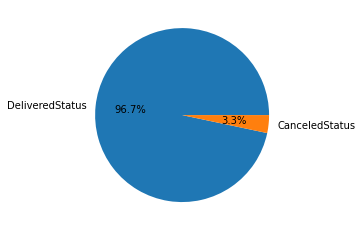

In [1351]:
# 3.3% of orders are canceled
final_status_proportion = df.final_status.value_counts(normalize=True)
plt.pie(final_status_proportion, labels=final_status_proportion.index, autopct='%.1f%%')
plt.show()

In [1352]:
# The following couriers got their orders cancelled more than 10% of the times with at least 5 orders.
# courier_id 16327386.0 is an extreme case. His/her ordered canceled 6 out of 12 times. 
is_canceled_by_courier_id = df.groupby("courier_id").is_canceled_status.agg(["mean", "count"])
is_canceled_by_courier_id[is_canceled_by_courier_id["count"]>5].sort_values("mean", ascending=False).head(5)

,mean,count
courier_id,,
16327386.0,0.500000,12
20153483.0,0.125000,8
18225713.0,0.117647,34
13822458.0,0.111111,9
2234219.0,0.105263,38


In [1353]:
# courier_id 16327386.0 shows low speed, long total time, and a few incorrect times.
df[df.courier_id==16327386.0]

,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,...,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,is_canceled_status,is_reassigned,total_time,waiting_time_at_pickup,courier_travel_time,courier_speed
830,DeliveredStatus,18300.0,20343272.0,16327386.0,WALL - Partner,True,MOTORBIKE,1.0,2.638,2019-07-11 20:00:02,...,2019-07-11 20:00:28,2019-07-11 20:15:39,2019-07-11 20:33:09,2019-07-11 20:35:32,0.0,False,35.500000,15.183333,17.533333,0.150456
831,DeliveredStatus,34476.0,14918928.0,16327386.0,WALL - Partner,True,MOTORBIKE,1.0,3.414,2019-07-11 20:29:17,...,2019-07-11 20:39:29,2019-07-11 20:39:29,2019-07-11 20:39:32,2019-07-11 20:39:34,0.0,False,10.283333,0.000000,3.533333,0.966226
832,DeliveredStatus,85260.0,2775077.0,16327386.0,WALL - Partner,True,MOTORBIKE,3.0,7.587,2019-07-11 20:25:47,...,2019-07-11 21:15:29,2019-07-11 21:23:24,2019-07-11 21:33:37,2019-07-11 21:36:29,0.0,True,70.700000,7.916667,36.466667,0.208053
833,CanceledStatus,30640.0,20376131.0,16327386.0,WALL - Partner,True,MOTORBIKE,1.0,1.368,2019-07-09 21:18:15,...,2019-07-09 21:21:55,2019-07-09 21:49:06,2019-07-09 21:53:22,2019-07-09 22:02:34,1.0,False,44.316667,27.183333,5.983333,0.228635
834,DeliveredStatus,18300.0,2215574.0,16327386.0,WALL - Partner,True,MOTORBIKE,1.0,4.401,2019-07-12 20:38:47,...,2019-07-12 20:38:57,2019-07-12 21:03:39,2019-07-12 21:16:40,2019-07-12 21:18:47,0.0,False,40.000000,24.700000,13.016667,0.338105
835,DeliveredStatus,48634.0,10401992.0,16327386.0,WALL - Partner,False,MOTORBIKE,1.0,3.326,2019-07-11 20:41:01,...,2019-07-11 20:46:04,2019-07-11 20:49:06,2019-07-11 20:56:03,2019-07-11 21:01:02,0.0,False,20.016667,3.033333,11.933333,0.278715
836,CanceledStatus,NaN,20373031.0,16327386.0,QUIERO,False,MOTORBIKE,1.0,6.273,2019-07-09 20:04:31,...,2019-07-09 20:06:09,2019-07-09 20:06:09,NaT,2019-07-09 20:46:44,1.0,False,42.216667,0.000000,NaN,NaN
837,CanceledStatus,18300.0,16962043.0,16327386.0,WALL - Partner,True,MOTORBIKE,1.0,8.779,2019-07-12 21:19:10,...,2019-07-12 21:28:36,2019-07-12 21:56:22,2019-07-12 22:06:56,2019-07-12 22:38:59,1.0,False,79.816667,27.766667,14.233333,0.616792
838,CanceledStatus,18300.0,19445765.0,16327386.0,WALL - Partner,True,MOTORBIKE,2.0,13.638,2019-07-10 20:35:37,...,NaT,NaT,NaT,2019-07-10 21:32:57,1.0,True,57.333333,NaN,NaN,NaN
839,DeliveredStatus,18300.0,12891673.0,16327386.0,WALL - Partner,True,MOTORBIKE,1.0,5.310,2019-07-11 21:41:43,...,2019-07-11 21:43:50,2019-07-11 22:18:26,2019-07-11 22:24:20,2019-07-11 22:30:13,0.0,False,48.500000,34.600000,7.583333,0.700220


In [1354]:
# customer_id 20539057.0 has canceled 7 orders in the past week.
df[df.final_status=="CanceledStatus"].customer_id.value_counts().head(3)

20539057.0    7
6124041.0     3
17992149.0    2
Name: customer_id, dtype: int64

In [1355]:
# Looks like he/she just mistakenly placed 7 orders at the same time.
df[df.customer_id==20539057.0]

,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,...,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,is_canceled_status,is_reassigned,total_time,waiting_time_at_pickup,courier_travel_time,courier_speed
841,CanceledStatus,NaN,20539057.0,16327386.0,QUIERO,False,MOTORBIKE,1.0,5.169,2019-07-13 14:26:38,...,2019-07-13 14:30:25,2019-07-13 14:30:25,NaT,2019-07-13 14:41:33,1.0,False,14.916667,0.0,NaN,NaN
1478,CanceledStatus,NaN,20539057.0,13529777.0,QUIERO,False,CAR,4.0,8.690,2019-07-13 14:27:18,...,NaT,NaT,NaT,2019-07-13 14:43:20,1.0,True,16.033333,NaN,NaN,NaN
1599,CanceledStatus,NaN,20539057.0,19711951.0,QUIERO,False,MOTORBIKE,1.0,5.040,2019-07-13 14:25:23,...,NaT,NaT,NaT,2019-07-13 14:41:26,1.0,False,16.050000,NaN,NaN,NaN
1675,CanceledStatus,NaN,20539057.0,6212245.0,QUIERO,False,MOTORBIKE,1.0,5.145,2019-07-13 14:29:31,...,NaT,NaT,NaT,2019-07-13 14:42:07,1.0,False,12.600000,NaN,NaN,NaN
1676,CanceledStatus,NaN,20539057.0,6212245.0,QUIERO,False,MOTORBIKE,1.0,5.156,2019-07-13 14:24:19,...,NaT,NaT,NaT,2019-07-13 14:36:31,1.0,False,12.200000,NaN,NaN,NaN
2286,CanceledStatus,NaN,20539057.0,8046350.0,QUIERO,False,MOTORBIKE,2.0,6.606,2019-07-13 14:23:34,...,NaT,NaT,NaT,2019-07-13 14:44:27,1.0,True,20.883333,NaN,NaN,NaN
2455,CanceledStatus,NaN,20539057.0,19090546.0,QUIERO,False,CAR,1.0,17.887,2019-07-13 14:28:31,...,NaT,NaT,NaT,2019-07-13 14:42:46,1.0,False,14.250000,NaN,NaN,NaN


#### store_address_id

In [1356]:
# There is a huge variance in the number of orders delivered by different stores.
df.store_address_id.value_counts().describe()

count     67.000000
mean      36.417910
std      123.211342
min        1.000000
25%        3.500000
50%        9.000000
75%       22.000000
max      977.000000
Name: store_address_id, dtype: float64

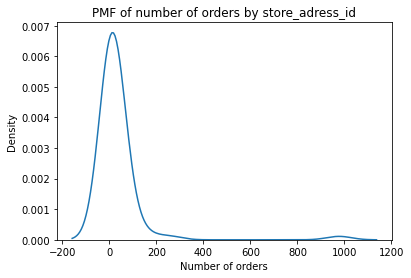

In [1357]:
sns.kdeplot(df.store_address_id.value_counts())
plt.title("PMF of number of orders by store_adress_id")
plt.xlabel("Number of orders")
plt.show()

#### customer_id

In [1358]:
# On average Glovo customers order 1.3 meals per week.
df.customer_id.value_counts().describe()

count    1891.000000
mean        1.306716
std         0.790855
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        16.000000
Name: customer_id, dtype: float64

In [1359]:
# Number of customers that placed certain number of weekly orders.
df.customer_id.value_counts().value_counts()


1     1500
2      285
3       62
4       26
5       10
6        4
7        3
16       1
Name: customer_id, dtype: int64

In [1360]:
# And the customer of the week is... 389187.0! With 16 delivered orders. Someone send this man/woman a Glovo t-shirt.
df[df.final_status=="DeliveredStatus"].customer_id.value_counts().head(1)

5389187.0    16
Name: customer_id, dtype: int64

#### courier_id

In [1361]:
# An average courier delivers 30 orders per week, or around 4 per day.
df.courier_id.value_counts().describe()

count     83.000000
mean      29.771084
std       25.225000
min        1.000000
25%        9.000000
50%       25.000000
75%       42.500000
max      124.000000
Name: courier_id, dtype: float64

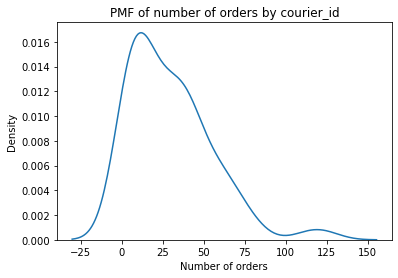

In [1362]:
# The outliers are likely to be couriers that ride as a full time job.
sns.kdeplot(df.courier_id.value_counts())
plt.title("PMF of number of orders by courier_id")
plt.xlabel("Number of orders")
plt.show()

#### vertical

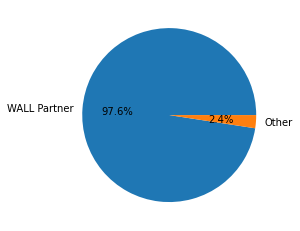

In [1363]:
# About 98% of orders come from partner stores.
vertical_proportion = df.vertical.value_counts(normalize=True)
labels = "WALL Partner", "Other"
sizes = vertical_proportion[0], 1 - vertical_proportion[0]
plt.pie(sizes, labels=labels, autopct='%.1f%%')
plt.show()

#### is_food

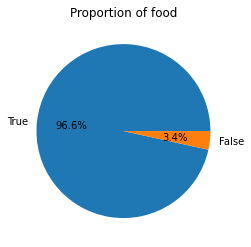

In [1364]:
# About 97% of orders are food.
is_food_proportion = df.is_food.value_counts(normalize=True)
plt.pie(is_food_proportion, labels=is_food_proportion.index, autopct='%.1f%%')
plt.title("Proportion of food", size = 12)
plt.show()

#### transport

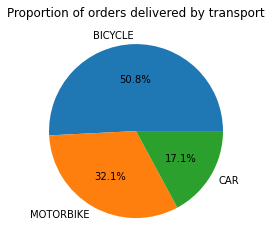

In [1365]:
transport_proportion = df.transport.value_counts(normalize=True)
plt.pie(transport_proportion, labels=transport_proportion.index, autopct='%.1f%%')
plt.title("Proportion of orders delivered by transport", size = 12)
plt.show()

#### number_of_assignments

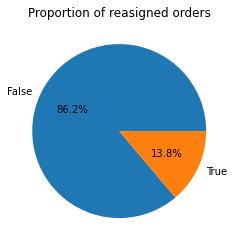

In [1366]:
# 13% of orders are reassigned at least once
is_reassigned_proportion = df.is_reassigned.value_counts(normalize=True)
plt.pie(is_reassigned_proportion, labels=is_reassigned_proportion.index, autopct='%.1f%%')
plt.title("Proportion of reasigned orders", size = 12)
plt.show()

In [1367]:
# It is extremely rare that orders are reassigned more than twice
df.number_of_assignments.value_counts(normalize=True)

1.0    0.861594
2.0    0.110886
3.0    0.022663
4.0    0.003642
6.0    0.000809
5.0    0.000405
Name: number_of_assignments, dtype: float64

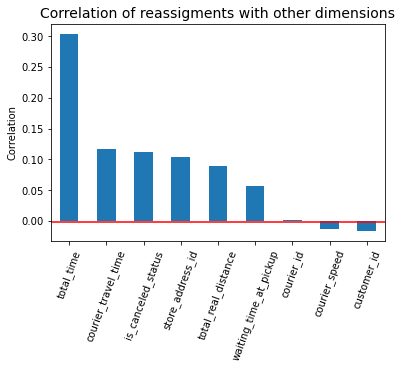

In [1390]:
# For the numerical values, the number of assigments seem to correlate with longer delivery times and distances, 
# and canceled orders. 
df.corr().number_of_assignments.sort_values(ascending=False)[2:].plot(kind="bar")
plt.title("Correlation of reassigments with other dimensions", size=14)
plt.ylabel("Correlation")
plt.axhline(y=-0.001, color='r', linestyle='-')
plt.xticks(rotation=70)
plt.show()

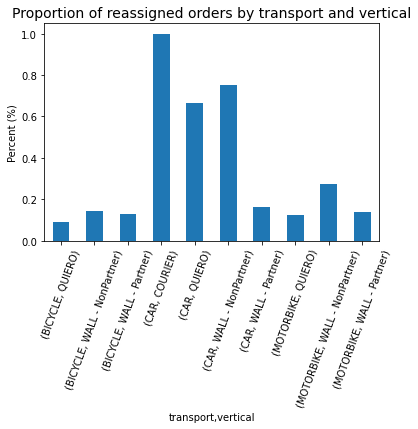

In [1391]:
# Looking at the categorical values, we see that reasigned orders tend to be accepted mostly by cars, especially those
# orders from the QUIERO and NonPartner verticals. 
# Seems to indicate that some of these custom orders are not maneagable by bikes or bicycles. 
df.groupby(["transport", "vertical"]).is_reassigned.mean().plot(kind="bar")
plt.title("Proportion of reassigned orders by transport and vertical", size=14)
plt.ylabel("Percent (%)")
plt.xticks(rotation=70)
plt.show()

#### total_real_distance

In [1370]:
# On average couriers have to travel 5km to deliver each order
df.total_real_distance.describe()

count    2471.000000
mean        5.045905
std         2.478414
min         0.708000
25%         3.342000
50%         4.560000
75%         6.132000
max        19.789000
Name: total_real_distance, dtype: float64

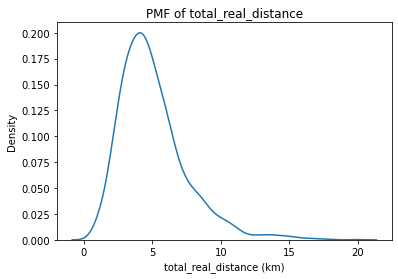

In [1371]:
sns.kdeplot(df.total_real_distance)
plt.title("PMF of total_real_distance")
plt.xlabel("total_real_distance (km)")
plt.show()

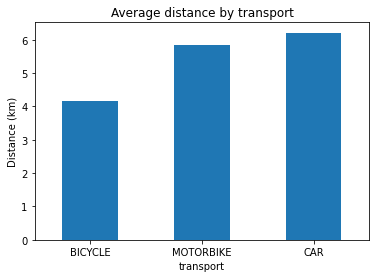

In [1372]:
# Cars travel the farthest on average
df.groupby("transport").total_real_distance.mean().sort_values().plot(kind="bar")
plt.title("Average distance by transport")
plt.ylabel("Distance (km)")
plt.xticks(rotation=0)
plt.show()

#### total_time

In [1373]:
# On average customers get their order in 38 minutes
(df.total_time).describe()

count    2471.000000
mean       37.950236
std        17.378624
min         0.266667
25%        25.491667
50%        34.683333
75%        46.258333
max       122.583333
Name: total_time, dtype: float64

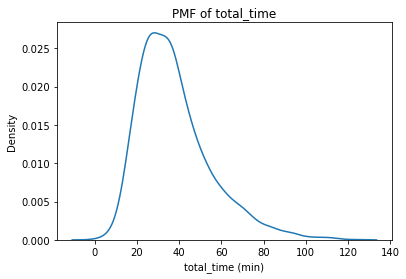

In [1374]:
sns.kdeplot(df.total_time)
plt.title("PMF of total_time")
plt.xlabel("total_time (min)")
plt.show()

In [1375]:
# 11% of orders take over 60 minutes to be delivered
(df.total_time>60).value_counts(normalize=True)

False    0.8879
True     0.1121
Name: total_time, dtype: float64

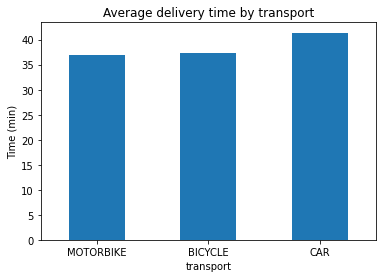

In [1376]:
df.groupby("transport").total_time.mean().sort_values().plot(kind="bar")
plt.title("Average delivery time by transport")
plt.ylabel("Time (min)")
plt.xticks(rotation=0)
plt.show()

#### waiting_time_at_pickup

In [1377]:
# On average couriers wait for 15 minutes at the store for pickup.
# There is a large variance and some orders take a very long waiting_time_at_pickup.
df.waiting_time_at_pickup.describe()

count    2410.000000
mean       15.244315
std        12.798476
min        -1.833333
25%         7.050000
50%        11.683333
75%        18.700000
max        87.233333
Name: waiting_time_at_pickup, dtype: float64

In [1378]:
# 2 errors with negative waiting time.
# We replace negative waiting time with 0.
print((df.waiting_time_at_pickup<0).sum())
df.loc[df.waiting_time_at_pickup < 0, "waiting_time_at_pickup"] = 0

2


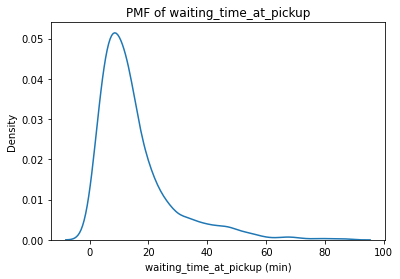

In [1379]:
sns.kdeplot(df.waiting_time_at_pickup)
plt.title("PMF of waiting_time_at_pickup")
plt.xlabel("waiting_time_at_pickup (min)")
plt.show()

In [1380]:
# These are the stores with at least 5 orders with the highest average waiting time
waiting_time_by_store = df.groupby("store_address_id").waiting_time_at_pickup.agg(["mean", "count"])
waiting_time_by_store[waiting_time_by_store["count"]>=5].sort_values(by="mean", ascending=False).head()

,mean,count
store_address_id,,
82665.0,20.869231,13
15910.0,20.415064,52
74656.0,20.058333,6
30640.0,19.722148,149
18300.0,19.103596,964


In [1381]:
# Couriers with at least 5 orders with the highest average waiting time
waiting_time_by_courier = df.groupby("courier_id").waiting_time_at_pickup.agg(["mean", "count"])
waiting_time_by_courier[waiting_time_by_courier["count"]>=5].sort_values(by="mean", ascending=False).head()

,mean,count
courier_id,,
7290210.0,24.511111,18
8316271.0,24.346667,10
13822458.0,23.596296,9
18225711.0,23.594298,38
17436695.0,23.000000,7


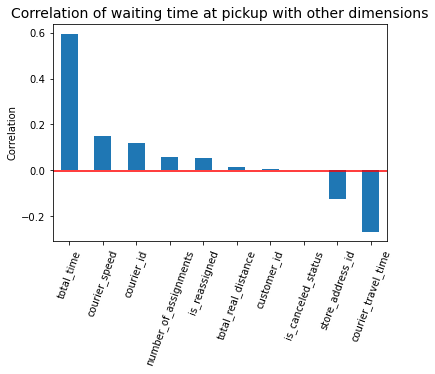

In [1392]:
# The waiting time at pickup is highly correlated to total_time (as expected), 
# and also negatively correlated with courier_travel_time, less travel means reaching 
# the store earlier and thus waiting more.
df.corr().waiting_time_at_pickup.sort_values(ascending=False)[1:].plot(kind="bar")
plt.title("Correlation of waiting time at pickup with other dimensions", size=14)
plt.ylabel("Correlation")
plt.axhline(y=-0.001, color='r', linestyle='-')
plt.xticks(rotation=70)
plt.show()

#### courier_travel_time

In [1382]:
# On average couriers spend 14 minutes on traveling alone
df.courier_travel_time.describe()

count    2404.000000
mean       14.036432
std         8.617099
min         0.100000
25%         7.995833
50%        12.016667
75%        17.987500
max        74.566667
Name: courier_travel_time, dtype: float64

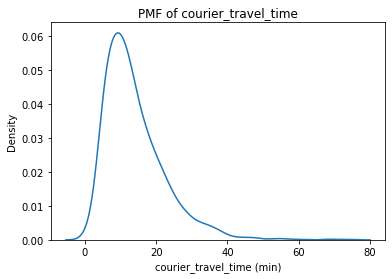

In [1383]:
sns.kdeplot(df.courier_travel_time)
plt.title("PMF of courier_travel_time")
plt.xlabel("courier_travel_time (min)")
plt.show()

#### courier_speed

In [1384]:
# On average, couriers move at 0.5 km/min.
# There are some unrealistic speeds that point at either some errors or possible missuses of the app.
df.courier_speed.describe()

count    2404.000000
mean        0.493884
std         1.452832
min         0.053004
25%         0.282404
50%         0.377956
75%         0.515209
max        54.120000
Name: courier_speed, dtype: float64

In [1385]:
# Some couriers do not confirm the pickup at the time they pickup the order, which explains the 
# unrealistic speeds and the large waiting_time_at_pickup on some orders that we saw on a previous chart.
df.sort_values(by="courier_speed", ascending=False).head()

,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,...,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,is_canceled_status,is_reassigned,total_time,waiting_time_at_pickup,courier_travel_time,courier_speed
2056,DeliveredStatus,18300.0,16552619.0,16974422.0,WALL - Partner,True,BICYCLE,1.0,5.412,2019-07-09 21:02:12,...,2019-07-09 21:02:12,2019-07-09 22:10:04,2019-07-09 22:10:10,2019-07-09 22:10:15,0.0,False,68.050000,67.866667,0.100000,54.120000
2204,DeliveredStatus,18300.0,20416485.0,9558769.0,WALL - Partner,True,MOTORBIKE,1.0,5.084,2019-07-10 20:18:11,...,2019-07-10 20:36:42,2019-07-10 21:23:08,2019-07-10 21:23:18,2019-07-10 21:23:28,0.0,False,65.283333,46.433333,0.166667,30.504000
91,DeliveredStatus,18300.0,5389187.0,14917583.0,WALL - Partner,True,BICYCLE,1.0,3.327,2019-07-08 14:33:10,...,2019-07-08 14:33:17,2019-07-08 14:46:12,2019-07-08 14:46:20,2019-07-08 14:46:28,0.0,False,13.300000,12.916667,0.133333,24.952500
2427,DeliveredStatus,18300.0,12535717.0,15058366.0,WALL - Partner,True,BICYCLE,1.0,4.423,2019-07-08 19:52:43,...,2019-07-08 19:52:54,2019-07-08 20:11:11,2019-07-08 20:11:23,2019-07-08 20:13:29,0.0,False,20.766667,18.283333,0.200000,22.115000
2098,DeliveredStatus,18300.0,3939091.0,2234219.0,WALL - Partner,True,MOTORBIKE,2.0,3.830,2019-07-14 21:24:36,...,2019-07-14 21:41:39,2019-07-14 21:41:39,2019-07-14 21:42:20,2019-07-14 21:43:00,0.0,True,18.400000,0.000000,0.683333,5.604878


In [1386]:
# We set the realistic speed threshold at 1 km / min. 
# These are the couriers ids that have reported an unrealistic speed more than 4 times. We could send them a 
# remainder that they need to confirm the order and the pickup from the store.
unrealistic_run_by_courier = df[df.courier_speed>1].courier_id.value_counts()
unrealistic_run_by_courier[unrealistic_run_by_courier>3]

14917583.0    11
18225711.0     6
14547214.0     5
4055620.0      4
15239373.0     4
18225713.0     4
Name: courier_id, dtype: int64

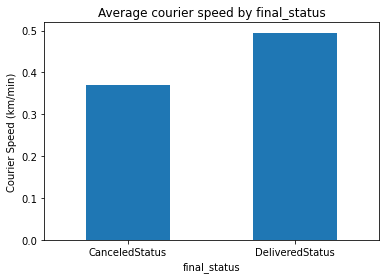

In [1387]:
# The speed of the couriers is key to avoid canceled orders
df.groupby("final_status").courier_speed.mean().sort_values().plot(kind="bar")
plt.title("Average courier speed by final_status")
plt.ylabel("Courier Speed (km/min)")
plt.xticks(rotation=0)
plt.show()

#### Correlation Matrix

In [1388]:
# Transform bool and binary categorical variables to calculate the corr to other variables
corr_df = df.copy()
corr_df.is_food.replace({True: 1, False: 0}, inplace=True)
corr_df["is_canceled_status"] = corr_df.final_status.replace({"DeliveredStatus": 0, "CanceledStatus": 1})

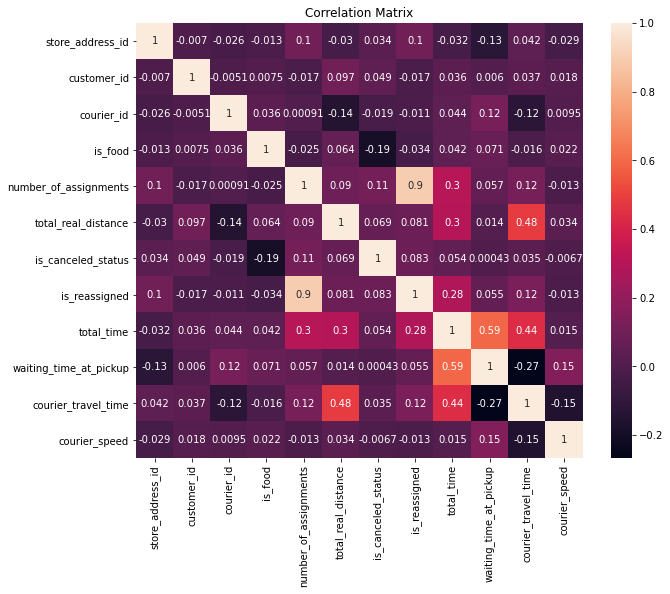

In [1389]:
plt.figure(figsize=(10, 8))
corrMatrix = corr_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

Some learnings from the correlation matrix not mentioned yet:

- Correlations are not strong
- Non-food orders get canceled more
- total_time is much more correlated to waiting times at pickup rather than slow courier speeds.